---
---
---

# Exploratory Data Analysis: ROLLER COASTERS

Welcome! 

In this guided in-class activity, we're going to work off of a brand new data and attempt to exercise our exploratory data science muscles by cleaning up our data and then asking and answering some interesting questions off of our dataset! 

Let's jump in! 

## Load in DS Toolkit and Explore!

Import DS toolkit for analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set and load file from filepath.

In [2]:
FILEPATH = "coaster_db.csv"

In [3]:
df_coasters = pd.read_csv(FILEPATH)

Take a peak at the loaded data.

In [4]:
df_coasters.head(3)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


Get some basic explanatory information on our data.

In [5]:
df_coasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

Obtain descriptive stats on numerical features.

In [6]:
df_coasters.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## Basic Null Value Imputation/Cleaning

Capture filter of null value representation across dataset.

In [7]:
df_coasters.isna()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,False,True,True,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,False,False
2,False,True,True,False,False,True,False,True,True,True,...,True,True,True,True,True,True,True,True,False,True
3,False,True,True,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,False,True
4,False,True,True,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,False,False,False,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1083,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1084,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1085,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True


**Custom script to remove columns from data that contain over X% of null values.**

We set `X` to be equal to whatever proportion that we deem allowable or not.

For example, if we only want columns that contain 90% or more existing values (thus, that contain 10% or less null values), then 10% is our cutoff/threshold for removal, and we set `X` equal to 10%. 

From there, it's good practice to not drop columns during iteration since that can lead to side effects, so instead we loop over our columns, identify qualifying columns for removal, and then remove them after iteration using `pd.DataFrame.drop`. 

In [9]:
ALLOWABLE_PERCENTAGE_MISSING = 0.25
df_size = len(df_coasters)
features_to_drop = []

# Loop through all columns/features in our dataset to find ones to drop.
for feature in df_coasters:
    # Check that we can calculate percentage of missing values per column.
    print(f"Null Value % for Column `{feature}`: {round(sum(df_coasters[feature].isna()) / df_size, 2)}")

    # Save proportion of missing values per column as variable.
    proportion_of_null_values_for_column = sum(df_coasters[feature].isna()) / df_size

    # If a feature's null value proportion is higher than 0.25, mark that feature to be deleted after iteration.
    if proportion_of_null_values_for_column > ALLOWABLE_PERCENTAGE_MISSING:
        features_to_drop.append(feature)

# After iterating, drop null-marked features from my original data.
df_coasters_null_imputed = df_coasters.drop(columns=features_to_drop)

Null Value % for Column `coaster_name`: 0.0
Null Value % for Column `Length`: 0.12
Null Value % for Column `Speed`: 0.14
Null Value % for Column `Location`: 0.0
Null Value % for Column `Status`: 0.2
Null Value % for Column `Opening date`: 0.23
Null Value % for Column `Type`: 0.0
Null Value % for Column `Manufacturer`: 0.05
Null Value % for Column `Height restriction`: 0.24
Null Value % for Column `Model`: 0.32
Null Value % for Column `Height`: 0.11
Null Value % for Column `Inversions`: 0.14
Null Value % for Column `Lift/launch system`: 0.27
Null Value % for Column `Cost`: 0.65
Null Value % for Column `Trains`: 0.34
Null Value % for Column `Park section`: 0.55
Null Value % for Column `Duration`: 0.3
Null Value % for Column `Capacity`: 0.47
Null Value % for Column `G-force`: 0.67
Null Value % for Column `Designer`: 0.47
Null Value % for Column `Max vertical angle`: 0.67
Null Value % for Column `Drop`: 0.55
Null Value % for Column `Soft opening date`: 0.91
Null Value % for Column `Fast La

Now we can see the remaining data does not contain any of our marked columns. 

**This DOES NOT mean we no longer have null values in our data.**

Rather, we have fewer due to our prior removal, but to truly impute all of them, we'll have to be a lot more meticulous with how we detect and replace/remove them. 

We'll save that for later...

In [65]:
df_coasters_null_imputed.head(3)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Height,...,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,Inversions_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,50 ft (15 m),...,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,0
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### EVALUATE: Is `speed_mph` merely a result of combining `speed_value` and `speed_unit`?

This is an example of an evaluative question that seeks less to answer something interestingly descriptive and instead attempts to better understand our data from an initial diagnostic perspective. 

In this specific case, we have multiple speed-related columns. 

Are all of them valuable, or can we afford to drop any of them?

One easy way of answering this is by verifying that data that occurs across many of them are duplicates or not... if they are duplicated and simply converted into different formats, then we can safely assume we're not losing any data by deleting duplicates/copies. 

In [15]:
df_coasters_null_imputed["speed1_unit"].unique()

array(['mph', nan, 'km/h'], dtype=object)

We've discovered something interesting! 

It turns out that `speed1_unit` contains units for both miles-per-hour and kilometers-per-hour... this means that we can safely say that `speed_mph` is _NOT_ just a simple string aggregation of `speed1_value` and `speed1_unit`. 

Thus, we gotta actively explore more.

Let's now evaluate the specific rows in the dataset where `speed1_unit` contains kilometers-per-hour units (or `km/h`). 

In [13]:
WHERE_SP1_UNITS_ARE_KMPH = (df_coasters_null_imputed["speed1_unit"] == "km/h")

df_coasters_null_imputed[WHERE_SP1_UNITS_ARE_KMPH]

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Height,...,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,Inversions_clean
15,The Great Scenic Railway,"967 m (3,173 ft)",60 km/h (37 mph),Luna Park Melbourne,Operating,December 1912,Wood,LaMarcus Thompson,100 cm (3 ft 3 in),16 m (52 ft),...,Wood,1912-12-01,60 km/h,37 mph,60.0,km/h,37.3,16.0,m,0
53,Yankee Cannonball,"609.6 m (2,000 ft)",56.3 km/h (35.0 mph),Canobie Lake Park,Operating,1930,Wood – Out and back,Philadelphia Toboggan Coasters,NaN,19.8 m (65 ft),...,Wood,1930-01-01,56.3 km/h,35.0 mph,56.3,km/h,35.0,19.8,m,0
73,Vuoristorata,"960 m (3,150 ft)",60 km/h (37 mph),Linnanmäki,Operating,13 July 1951; 70 years ago,Wood – Side friction,"Linnanmäki, led by Svend Jarlström",140 cm (4 ft 7 in),24 m (79 ft),...,Wood,1951-07-13,60 km/h,37 mph,60.0,km/h,37.3,24.0,m,0
79,Wooden Roller Coaster (Playland),"2,840 ft (870 m)",80 km/h (50 mph),Playland,Not Currently Operating,1958,Wood,NaN,48 in (122 cm),75 ft (23 m),...,Wood,1958-01-01,80 km/h,50 mph,80.0,km/h,49.7,75.0,ft,0
85,Giant Coaster (Fuji-Q Highland),"1,432 m (4,698 ft)",80 km/h (50 mph),Fuji-Q Highland,Removed,1966,Steel,Sansei Technologies,NaN,40 m (130 ft),...,Steel,1966-01-01,80 km/h,50 mph,80.0,km/h,49.7,40.0,m,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Yukon Striker,"1,105 m (3,625 ft)",130 km/h (81 mph),Canada's Wonderland,Operating,3 May 2019,Steel – Dive Coaster,Bolliger & Mabillard,52–77[1] in (132–196 cm),68 m (223 ft),...,Steel,2019-05-03,130 km/h,81 mph,130.0,km/h,80.8,68.0,m,4
1046,Zadra (roller coaster),"1,316 m (4,318 ft)",121 km/h (75 mph),Energylandia,Operating,22 August 2019,Other,Rocky Mountain Construction,140 cm (4 ft 7 in),62.8 m (206 ft),...,Other,2019-08-22,121 km/h,75 mph,121.0,km/h,75.2,62.8,m,3
1049,Max & Moritz (roller coaster),300 m (980 ft),36 km/h (22 mph),Efteling,Operating,"June 20, 2020",Steel – Powered – Dual-tracked,Mack Rides,100 cm (3 ft 3 in),6 m (20 ft),...,Steel,2020-06-20,36 km/h,22 mph,36.0,km/h,22.4,6.0,m,0
1052,Pitts Special (roller coaster),"693 m (2,274 ft)",100 km/h (62 mph),PowerPark,Operating,"June 24, 2020",Steel,Gerstlauer,130 cm (4 ft 3 in),43.5 m (143 ft),...,Steel,2020-06-24,100 km/h,62 mph,100.0,km/h,62.1,43.5,m,0


Ah, interesting... it _looks_ like `speed1` and `speed2` data are actually complimentary, meaning that when one of them is expressed by one of the units, the other feature always is expressed by the other unit.

This is a good assertion to explore, because it means that if validated and proven true, indicates that `speed1` and `speed2` are compliments of one another and do not contain unique data, but rather two different forms of the same data. 

Thus, if proven true, we can safely drop a majority of the speed-related data and keep one of the columns without fear of losing any data.

However, to prove this, we'll have to explore the speed data more closely, starting with our `speed2` metric. 

This is because while we have a `speed1_unit` column, we **do not** have a `speed2_unit` column.

In [22]:
df_coasters_null_imputed["speed2"]

0        9.7 km/h
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1082      85 km/h
1083     117 km/h
1084    95.4 km/h
1085      55 km/h
1086      93 km/h
Name: speed2, Length: 1087, dtype: object

In other words, in order to actually compare both features and the presence of matching unit notations, we'll have to invoke some string methods on their relevant Series. 

In [26]:
"""
Check the rows where SP1 and SP2 have identical units.

    SP1 and SP2 should both be measured with MPH.
                     OR
    SP1 and SP2 should both be measured with KM/H.
"""

WHERE_SP1_UNITS_ARE_KMPH = (df_coasters_null_imputed["speed1_unit"] == "km/h")
WHERE_SP2_UNITS_ARE_KMPH = df_coasters_null_imputed["speed2"].str.contains("km/h")

df_coasters_null_imputed[WHERE_SP1_UNITS_ARE_KMPH & WHERE_SP2_UNITS_ARE_KMPH]

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Height,...,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,Inversions_clean


This is good news! 

This shows that _there are no values in our dataset where `speed1` and `speed2` have matching units, proving that they truly are compliments of one another.

Technically, this analysis proves it for both the kilometers-per-hour and miles-per-hour cases, but just to be exhaustive, we'll perform the analysis again for `mph`.

In [27]:
WHERE_SP1_UNITS_ARE_MPH = (df_coasters_null_imputed["speed1_unit"] == "mph")
WHERE_SP2_UNITS_ARE_MPH = df_coasters_null_imputed["speed2"].str.contains("mph")

df_coasters_null_imputed[WHERE_SP1_UNITS_ARE_MPH & WHERE_SP2_UNITS_ARE_MPH]

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Height,...,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,Inversions_clean


And now we should be crystal clear – both columns are compliments of each other. 

Since all of the other speed-related columns are simply deconstructions or conversions of `speed1` and `speed2`, we know that we can get rid of all but one column without losing any data. 

---

There's plenty of other exploratory operations we can perform on our data, but for now, let's simply look into a basic exploratory analytical question to help get a sense for full EDA-based data science process!

### What's the proportions of each type?

From investigating the data from an elementary perspective, we can see that we have a column called `Type_Main` which measures interesting information pertaining to the physical fabrication of the roller coaster. 

Proportionality questions are generally easier to approach in Pandas due to the abundance of powerful methods to condense our data into exactly what we need, such as `.value_counts()`. 

In [55]:
type_proportions = df_coasters_null_imputed["Type_Main"].value_counts()

type_proportions

Type_Main
Steel    816
Wood     198
Other     73
Name: count, dtype: int64

That was easy! 

However, we're not done yet! 

Remember: every good data science question can be answered with more than just a script... visualization is key to communicate our findings to wider audiences and stakeholders. 

As such, let's make use of some Seaborn tools to help approach this process.

Seaborn boasts tools like `barplot` to help create... well, a bar plot. 

We simply need to pass the `X` and `y` data manually using our counted and saved values. 

<Axes: xlabel='Type_Main', ylabel='count'>

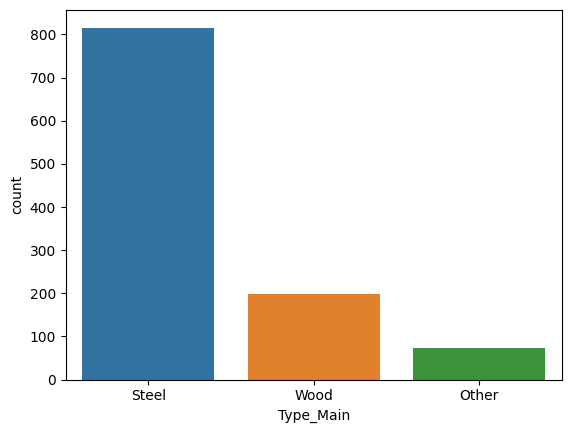

In [66]:
sns.barplot(x=type_proportions.index, y=type_proportions)

Luckily, this isn't our only tool! 

We can also use a tool like `countplot` that automatically knows to generate associated counts per unique value when given a specific categorical feature from a dataset. 

Very useful if we don't want to have to pass a Pandas Series to the visualization tool!

<Axes: xlabel='Type_Main', ylabel='count'>

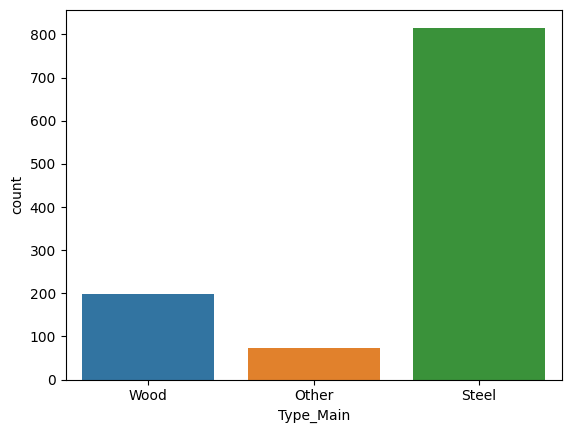

In [61]:
sns.countplot(x="Type_Main", data=df_coasters_null_imputed)

Plenty of other tools exist, such as `plt.hist` and `plt.bar` from `matplotlib.pyplot`. 

Our goal is to get accustomed to what tools work best for us to quickly and effectively move through the entire data science process from front to back. 

---
---

# TICKET-OUT-THE-DOOR EXERCISES:

### Ask and answer three (3) additional exploratory/descriptive analysis questions using a hybrid of scripting and visualization to aid you. 

---
---

### What is the relationship between a roller coaster's speed vs. maximum height? 

In [150]:
df_coasters_null_imputed.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Height', 'Inversions',
       'year_introduced', 'Type_Main', 'opening_date_clean', 'speed1',
       'speed2', 'speed1_value', 'speed1_unit', 'speed_mph', 'height_value',
       'height_unit', 'Inversions_clean'],
      dtype='object')

In [151]:
MASK_HEIGHTS_NOT_NULL = df_coasters_null_imputed[["height_value", "height_unit"]].notnull().all(axis=1)

heights_not_null_rows = df_coasters_null_imputed[MASK_HEIGHTS_NOT_NULL]

In [152]:
heights_not_null_rows["height_unit"].unique()

array(['ft', 'm'], dtype=object)

In [154]:
heights_not_null_rows.head(10)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Height,...,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,Inversions_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,50 ft (15 m),...,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,0
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,40 ft (12 m),...,Wood,1902-01-01,NaN,NaN,NaN,NaN,NaN,40.0,ft,0
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,41 ft (12 m),...,Wood,1902-01-01,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,0
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,60 ft (18 m),...,Other,1907-06-06,NaN,NaN,NaN,NaN,NaN,60.0,ft,0
13,Racer (1910 roller coaster),"4,500 ft (1,400 m)",40 mph (64 km/h),Kennywood,Operating,1927,Wood – Racing,Charlie Mach,46 in (117 cm),72.5 ft (22.1 m),...,Wood,1927-01-01,40 mph,64 km/h,40.0,mph,40.0,72.5,ft,0
15,The Great Scenic Railway,"967 m (3,173 ft)",60 km/h (37 mph),Luna Park Melbourne,Operating,December 1912,Wood,LaMarcus Thompson,100 cm (3 ft 3 in),16 m (52 ft),...,Wood,1912-12-01,60 km/h,37 mph,60.0,km/h,37.3,16.0,m,0
16,Zippin Pippin,"2,865 ft (873 m)",40 mph (64 km/h),Other,NaN,NaN,Wood,The Gravity Group,48 in (122 cm),70 ft (21 m),...,Wood,NaN,40 mph,64 km/h,40.0,mph,40.0,70.0,ft,0
20,The Wild One (roller coaster),"4,000 ft (1,200 m)",53 mph (85 km/h),Six Flags America,NaN,NaN,Wood,Dinn Corporation,48 in (122 cm),98 ft (30 m),...,Wood,NaN,53 mph,85 km/h,53.0,mph,53.0,98.0,ft,0
21,Jack Rabbit (Clementon Park),"1,380 ft (420 m)",NaN,Clementon Park,Removed,1919,Wood,Philadelphia Toboggan Coasters,NaN,50 ft (15 m),...,Wood,1919-01-01,NaN,NaN,NaN,NaN,NaN,50.0,ft,0
22,Jack Rabbit (Kennywood),"2,132 ft (650 m)",45 mph (72 km/h),Kennywood,Operating,1920,Wood,Harry C. Baker,42 in (107 cm),40 ft (12 m),...,Wood,1920-01-01,45 mph,72 km/h,45.0,mph,45.0,40.0,ft,0


In [155]:
height_standardization_table = {"ft": 1, "m": 3.281}

In [156]:
heights_not_null_rows["height_ft"] = heights_not_null_rows["height_value"] * heights_not_null_rows["height_unit"].map(height_standardization_table)

/var/folders/5w/kp4qn_2s3tq_3gm56l0hrtg40000gn/T/ipykernel_58646/120088711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heights_not_null_rows["height_ft"] = heights_not_null_rows["height_value"] * heights_not_null_rows["height_unit"].map(height_standardization_table)


In [158]:
heights_not_null_rows.head(10)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Height,...,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,Inversions_clean,height_ft
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,50 ft (15 m),...,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,0,50.000
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,40 ft (12 m),...,1902-01-01,NaN,NaN,NaN,NaN,NaN,40.0,ft,0,40.000
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,41 ft (12 m),...,1902-01-01,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,0,41.000
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,60 ft (18 m),...,1907-06-06,NaN,NaN,NaN,NaN,NaN,60.0,ft,0,60.000
13,Racer (1910 roller coaster),"4,500 ft (1,400 m)",40 mph (64 km/h),Kennywood,Operating,1927,Wood – Racing,Charlie Mach,46 in (117 cm),72.5 ft (22.1 m),...,1927-01-01,40 mph,64 km/h,40.0,mph,40.0,72.5,ft,0,72.500
15,The Great Scenic Railway,"967 m (3,173 ft)",60 km/h (37 mph),Luna Park Melbourne,Operating,December 1912,Wood,LaMarcus Thompson,100 cm (3 ft 3 in),16 m (52 ft),...,1912-12-01,60 km/h,37 mph,60.0,km/h,37.3,16.0,m,0,52.496
16,Zippin Pippin,"2,865 ft (873 m)",40 mph (64 km/h),Other,NaN,NaN,Wood,The Gravity Group,48 in (122 cm),70 ft (21 m),...,NaN,40 mph,64 km/h,40.0,mph,40.0,70.0,ft,0,70.000
20,The Wild One (roller coaster),"4,000 ft (1,200 m)",53 mph (85 km/h),Six Flags America,NaN,NaN,Wood,Dinn Corporation,48 in (122 cm),98 ft (30 m),...,NaN,53 mph,85 km/h,53.0,mph,53.0,98.0,ft,0,98.000
21,Jack Rabbit (Clementon Park),"1,380 ft (420 m)",NaN,Clementon Park,Removed,1919,Wood,Philadelphia Toboggan Coasters,NaN,50 ft (15 m),...,1919-01-01,NaN,NaN,NaN,NaN,NaN,50.0,ft,0,50.000
22,Jack Rabbit (Kennywood),"2,132 ft (650 m)",45 mph (72 km/h),Kennywood,Operating,1920,Wood,Harry C. Baker,42 in (107 cm),40 ft (12 m),...,1920-01-01,45 mph,72 km/h,45.0,mph,45.0,40.0,ft,0,40.000


<Axes: title={'center': 'Visualizing Roller Coasters: Speed vs. Height'}, xlabel='speed_mph', ylabel='height_ft'>

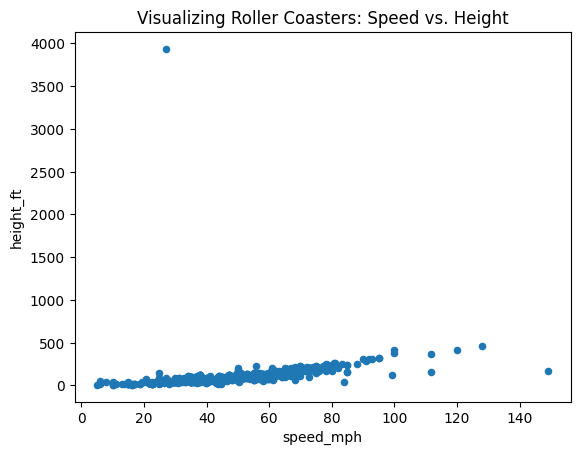

In [89]:
heights_not_null_rows.plot(
    kind="scatter",
    x="speed_mph",
    y="height_ft",
    title="Visualizing Roller Coasters: Speed vs. Height")

<Axes: title={'center': 'Visualizing Roller Coasters: Speed vs. Height'}, xlabel='speed_mph', ylabel='height_ft'>

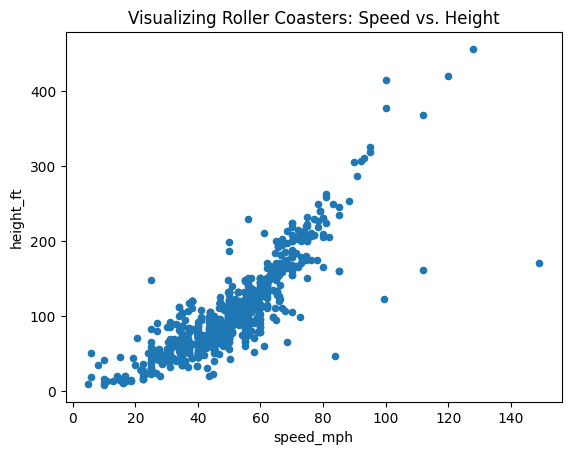

In [159]:
heights_no_outlier = heights_not_null_rows[heights_not_null_rows["height_ft"] < 3000]

heights_no_outlier.plot(
    kind="scatter",
    x="speed_mph",
    y="height_ft",
    title="Visualizing Roller Coasters: Speed vs. Height")

Text(0.5, 1.0, 'Visualizing Roller Coasters: Speed vs. Height')

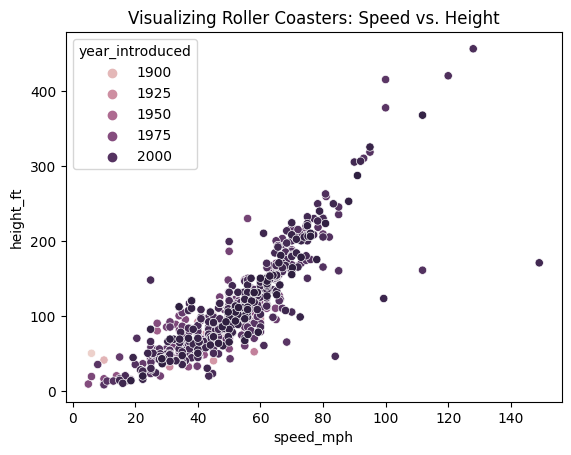

In [98]:
sns.scatterplot(
    x="speed_mph",
    y="height_ft",
    hue="year_introduced",
    data=heights_no_outlier).set_title("Visualizing Roller Coasters: Speed vs. Height")

### What's the distribution of total G-forces across all roller coasters?

In [126]:
df_coasters.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [131]:
df_coasters["Gforce_clean"].head(5)

0     2.9
1    12.0
2     NaN
3     NaN
4     NaN
Name: Gforce_clean, dtype: float64

In [132]:
MASK_CLEAN_GFORCES = (df_coasters["Gforce_clean"].notnull())

coaster_clean_gforces = df_coasters[MASK_CLEAN_GFORCES]

In [133]:
coaster_clean_gforces

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.90
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.00
26,Big Dipper (Blackpool Pleasure Beach),"3,300 ft (1,000 m)",40 mph (64 km/h),Blackpool Pleasure Beach,Operating,23 August 1923,Wood – Out and back,William Strickler,46 in (117 cm),Wooden Out and back coaster,...,40 mph,64 km/h,40.0,mph,40.0,65.0,ft,NaN,0,3.70
39,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,NaN,NaN,...,60 mph,97 km/h,60.0,mph,60.0,96.0,ft,NaN,0,4.00
42,Coney Island Cyclone,"2,640 ft (800 m)",60 mph (97 km/h),"Luna Park, Coney Island",Operating,"June 26, 1927",Other,NaN,54 in (137 cm),NaN,...,60 mph,97 km/h,60.0,mph,60.0,85.0,ft,NaN,0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,Steel Taipan,"3,937 ft (1,200 m)",65.2 mph (104.9 km/h),Dreamworld,Under construction,2021,Steel – Launched,Mack Rides,NaN,Launched roller coaster,...,65.2 mph,104.9 km/h,65.2,mph,65.2,128.0,ft,NaN,4,3.80
1073,ArieForce One,"3,400 ft (1,000 m)",64 mph (103 km/h),Fun Spot America Atlanta,Under construction,2022,Steel,Rocky Mountain Construction,48 in (122 cm),I-Box,...,64 mph,103 km/h,64.0,mph,64.0,154.0,ft,NaN,4,3.75
1077,Fønix (roller coaster),"2,969.2 ft (905.0 m)",59 mph (95 km/h),Fårup Sommerland,Under construction,NaN,Steel,Vekoma,120 cm (3 ft 11 in),Wildcat,...,59 mph,95 km/h,59.0,mph,59.0,131.2,ft,NaN,3,4.10
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.70


Text(0.5, 1.0, 'Visualizing Roller Coasters: Distribution of G-Forces')

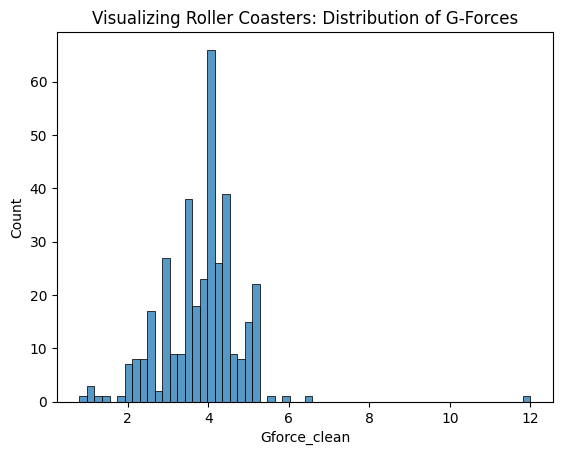

In [144]:
sns.histplot(
    data=coaster_clean_gforces,
    x="Gforce_clean",
    bins=60).set_title("Visualizing Roller Coasters: Distribution of G-Forces")

### What's the distribution of roller coaster speeds?

In [145]:
# Write more co
MASK_CLEAN_SPEEDS_MPH = (df_coasters["speed_mph"].notnull())

coaster_clean_speeds_mph = df_coasters[MASK_CLEAN_SPEEDS_MPH]

In [146]:
coaster_clean_speeds_mph

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,...,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
12,Backety-Back Scenic Railway,NaN,10 mph (16 km/h),Crystal Beach,Removed,1909,Wood – Shuttle,NaN,NaN,NaN,...,10 mph,16 km/h,10.0,mph,10.0,NaN,NaN,NaN,0,NaN
13,Racer (1910 roller coaster),"4,500 ft (1,400 m)",40 mph (64 km/h),Kennywood,Operating,1927,Wood – Racing,Charlie Mach,46 in (117 cm),Racing,...,40 mph,64 km/h,40.0,mph,40.0,72.5,ft,NaN,0,NaN
15,The Great Scenic Railway,"967 m (3,173 ft)",60 km/h (37 mph),Luna Park Melbourne,Operating,December 1912,Wood,LaMarcus Thompson,100 cm (3 ft 3 in),NaN,...,60 km/h,37 mph,60.0,km/h,37.3,16.0,m,52.5,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,...,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,...,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,...,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN


Text(0.5, 1.0, 'Visualizing Roller Coasters: Distribution of Speeds (MPH)')

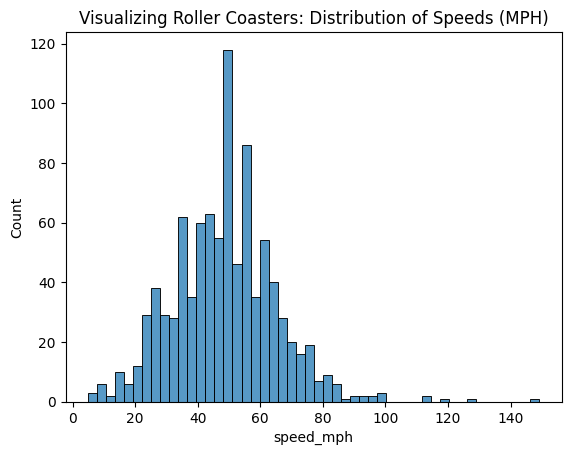

In [124]:
sns.histplot(
    data=coaster_clean_speeds_mph,
    x="speed_mph",
    bins=50).set_title("Visualizing Roller Coasters: Distribution of Speeds (MPH)")

---
---
---